In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


In [44]:
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt



Part 1: Data Exploration and Preprocessing
****
Data Understanding: Load the dataset and perform an initial exploration to understand its structure, identify missing values, and gather basic statistics.
Preprocessing: Clean the dataset by handling missing values, outliers, and any erroneous data

In [45]:
#getting data into a dataframe
df= pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')

In [46]:
#overview of data spread from top 5 rows
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [47]:
#Data Level attributes understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [48]:
#data distribution status report
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [49]:
#Checking Outliers
cols2=['Customer_Age',
'Dependent_count',
'Months_on_book',
'Total_Relationship_Count', 
'Months_Inactive_12_mon',
'Contacts_Count_12_mon', 
'Credit_Limit', 
'Total_Revolving_Bal',
'Avg_Open_To_Buy', 
'Total_Amt_Chng_Q4_Q1', 
'Total_Trans_Amt',
'Total_Trans_Ct', 
'Total_Ct_Chng_Q4_Q1', 
'Avg_Utilization_Ratio',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

out=[]
for i in cols2: 
    min, max=df[i].mean() - df[i].std()*3, df[i].mean() + df[i].std()*3
    x=(df[i] > min) & (df[i] < max)
    if len(x.value_counts())>1:
        out.append(i)
        print(i, x.value_counts()[1])


Customer_Age 1
Months_Inactive_12_mon 124
Contacts_Count_12_mon 54
Total_Amt_Chng_Q4_Q1 163
Total_Trans_Amt 391
Total_Trans_Ct 2
Total_Ct_Chng_Q4_Q1 113


/tmp/ipykernel_33/2045809553.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(i, x.value_counts()[1])


In [50]:
#Removing Outliers
for i in cols2: 
    min, max=df[i].mean() - df[i].std()*3, df[i].mean() + df[i].std()*3
    df=df[(df[i] > min) & (df[i] < max)]

In [51]:
label_encoder = LabelEncoder()
df['Attrition_Flag']=label_encoder.fit_transform(df['Attrition_Flag'])


In [52]:
cls=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for i in cls:
    print(df[i].value_counts())

Gender
F    5015
M    4302
Name: count, dtype: int64
Education_Level
Graduate         2890
High School      1837
Unknown          1391
Uneducated       1365
College           945
Post-Graduate     473
Doctorate         416
Name: count, dtype: int64
Marital_Status
Married     4252
Single      3688
Unknown      692
Divorced     685
Name: count, dtype: int64
Income_Category
Less than $40K    3323
$40K - $60K       1653
$80K - $120K      1396
$60K - $80K       1251
Unknown           1027
$120K +            667
Name: count, dtype: int64
Card_Category
Blue        8730
Silver       476
Gold          94
Platinum      17
Name: count, dtype: int64


In [53]:
# Separate target from predictors
y = df.Attrition_Flag
X = df.drop(['Attrition_Flag'], axis=1)


X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)


In [54]:
# set up the encoder
encoder = TargetEncoder(cols=cls)

# fit the encoder - finds the mean target value per category
encoder.fit(X_train, y_train)

# transform data
X_train_enc = encoder.transform(X_train)
X_valid_enc = encoder.transform(X_valid)



In [55]:
X_train_enc.columns

f_cols=['Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

#       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
#       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

<Axes: >

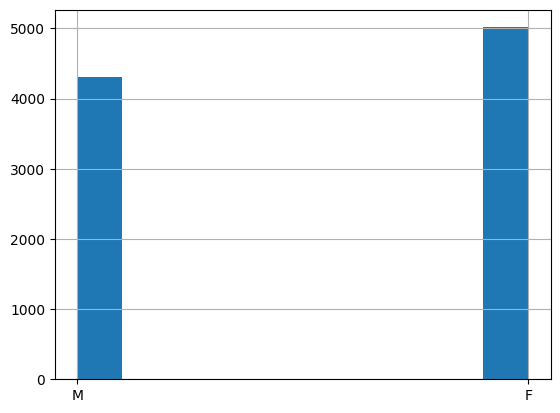

In [56]:

df['Gender'].hist()

In [57]:
model1 = RandomForestClassifier(n_estimators=100, random_state=0)
model1.fit(X_train_enc[f_cols], y_train)
preds1 = model1.predict(X_valid_enc[f_cols])


In [58]:

accuracy = accuracy_score(y_valid, preds1)


In [59]:
accuracy

0.9674535050071531

In [60]:
model2 = DecisionTreeClassifier()
model2.fit(X_train_enc[f_cols], y_train)
preds2 = model2.predict(X_valid_enc[f_cols])

In [61]:
accuracy = accuracy_score(y_valid, preds2)
accuracy

0.9345493562231759

In [62]:
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train_enc[f_cols], y_train)
preds3 = model3.predict(X_valid_enc[f_cols])

In [63]:
accuracy = accuracy_score(y_valid, preds3)
accuracy

0.8909155937052933

In [86]:

perm = PermutationImportance(model1, random_state=1).fit(X_valid_enc[f_cols], y_valid)
eli5.show_weights(perm, feature_names = f_cols)

Weight,Feature
0.1329 ± 0.0102,Total_Trans_Ct
0.0751 ± 0.0068,Total_Trans_Amt
0.0320 ± 0.0057,Total_Relationship_Count
0.0235 ± 0.0049,Total_Revolving_Bal
0.0142 ± 0.0032,Total_Ct_Chng_Q4_Q1
0.0085 ± 0.0023,Months_Inactive_12_mon
0.0079 ± 0.0036,Total_Amt_Chng_Q4_Q1
0.0064 ± 0.0013,Customer_Age
0.0033 ± 0.0025,Avg_Open_To_Buy
0.0031 ± 0.0023,Contacts_Count_12_mon


<Axes: >

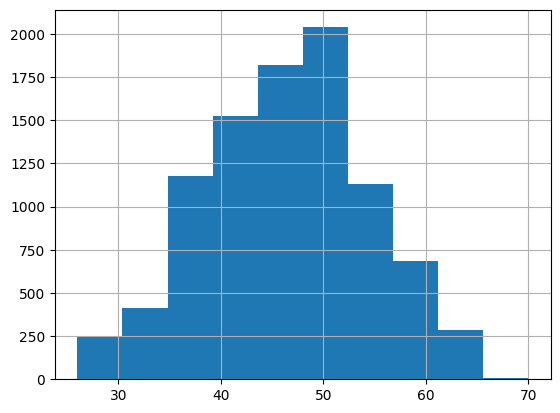

In [78]:
df['Customer_Age'].hist()

<Axes: >

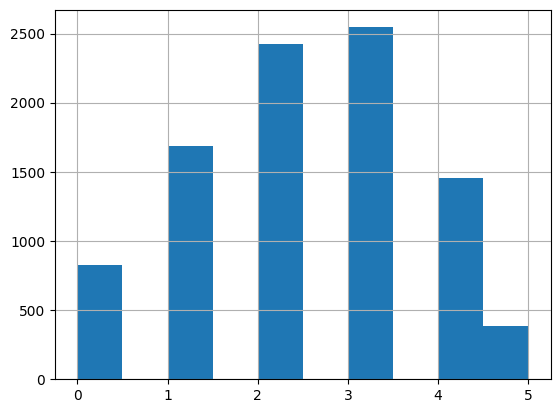

In [79]:
df['Dependent_count'].hist()

<Axes: >

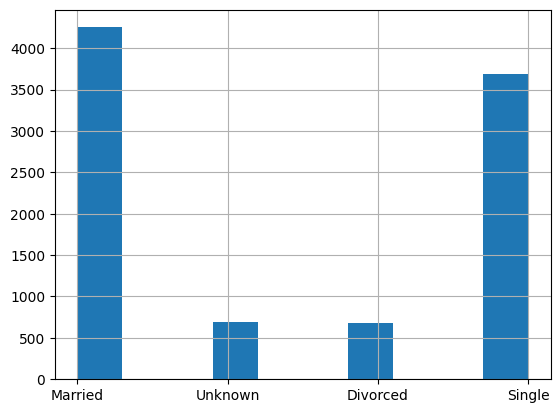

In [80]:
df['Marital_Status'].hist()

<Axes: >

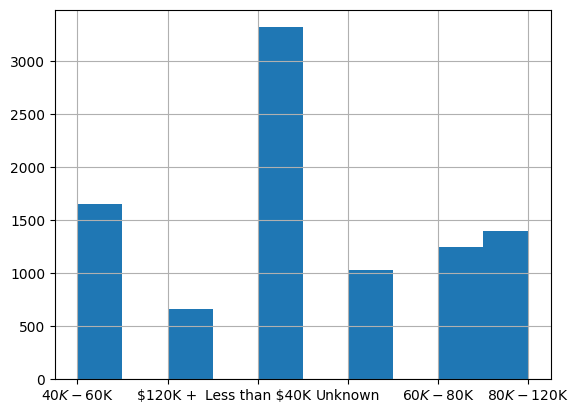

In [66]:
df['Income_Category'].hist()

<Axes: xlabel='Customer_Age'>

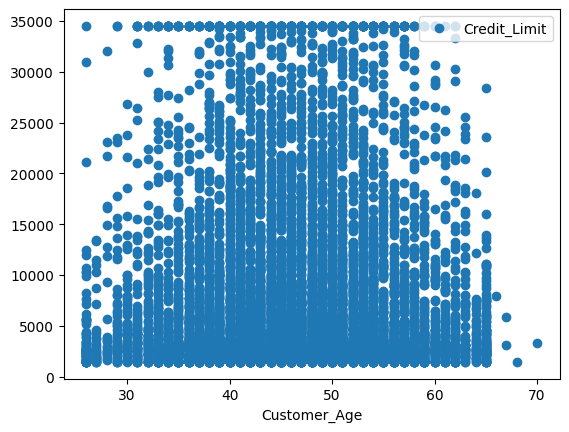

In [67]:
df[['Customer_Age', 'Credit_Limit' ]].plot(x='Customer_Age', y='Credit_Limit', style='o')

<Axes: xlabel='Total_Revolving_Bal'>

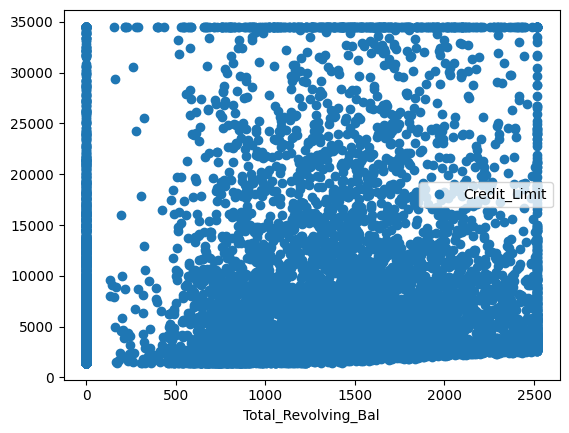

In [68]:
df[['Total_Revolving_Bal', 'Credit_Limit' ]].plot(x='Total_Revolving_Bal', y='Credit_Limit', style='o')

In [ ]:
Inc_cat=list(set(df['Income_Category']))
new_cat={'Unknown':1,
 '$40K - $60K':3,
 'Less than $40K':2,
 '$60K - $80K':4,
 '$80K - $120K':5,
 '$120K +':6}
df2=df.copy()
df2['Income_Category']=df2['Income_Category'].map(new_cat)


df2[['Income_Category', 'Credit_Limit' ]].plot(x='Income_Category', y='Credit_Limit', style='o')

Income Category has been updated with class digit to understand the data spread

'Unknown':1,
 '$40K - $60K':3,
 'Less than $40K':2,
 '$60K - $80K':4,
 '$80K - $120K':5,
 '$120K +':6

<Axes: xlabel='Customer_Age'>

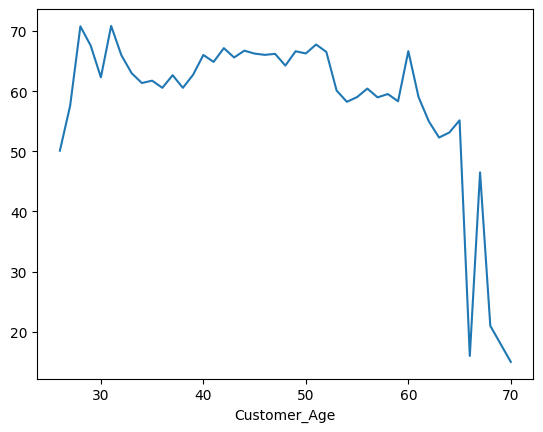

In [70]:
Age_TxnCt=df.groupby('Customer_Age')['Total_Trans_Ct'].mean()
Age_TxnCt.plot()

<Axes: xlabel='Customer_Age'>

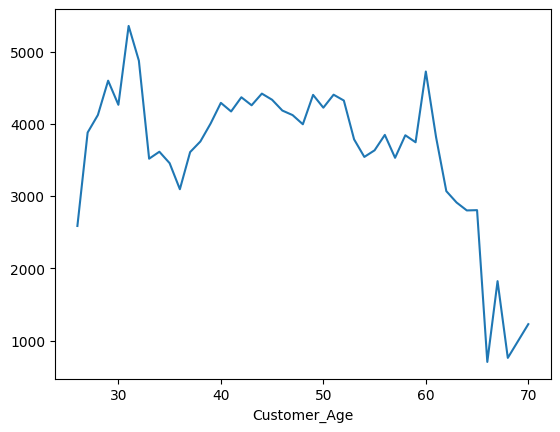

In [71]:

Age_TxnAmt=df.groupby('Customer_Age')['Total_Trans_Amt'].mean()
Age_TxnAmt.plot()

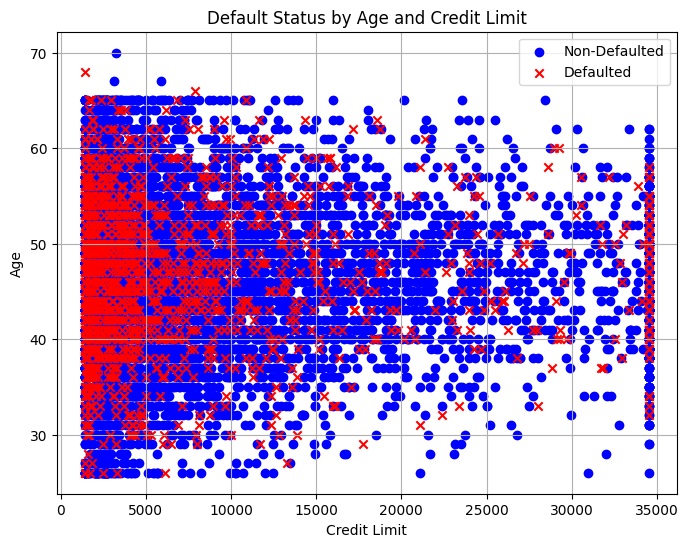

In [ ]:


# Separate data based on defaulted status
non_defaulted = df[df['Attrition_Flag'] == 1]
defaulted = df[df['Attrition_Flag'] == 0]



plt.figure(figsize=(8, 6))
plt.scatter(non_defaulted['Credit_Limit'], non_defaulted['Customer_Age'], label='Non-Defaulted', color='blue', marker='o')
plt.scatter(defaulted['Credit_Limit'], defaulted['Customer_Age'], label='Defaulted', color='red', marker='x')
plt.xlabel('Credit Limit')
plt.ylabel('Age')
plt.title('Default Status by Age and Credit Limit')
plt.legend()
plt.grid(True)
plt.show()

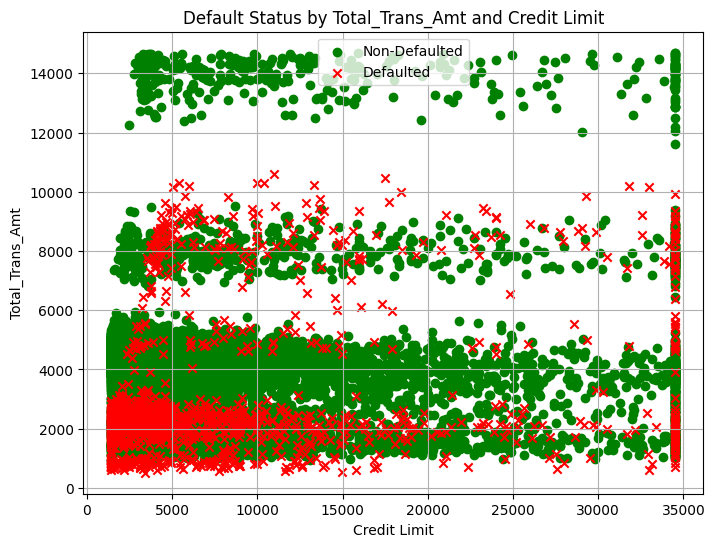

In [76]:


plt.figure(figsize=(8, 6))
plt.scatter(non_defaulted['Credit_Limit'], non_defaulted['Total_Trans_Amt'], label='Non-Defaulted', color='green', marker='o')
plt.scatter(defaulted['Credit_Limit'], defaulted['Total_Trans_Amt'], label='Defaulted', color='red', marker='x')
plt.xlabel('Credit Limit')
plt.ylabel('Total_Trans_Amt')
plt.title('Default Status by Total_Trans_Amt and Credit Limit')
plt.legend()
plt.grid(True)
plt.show()


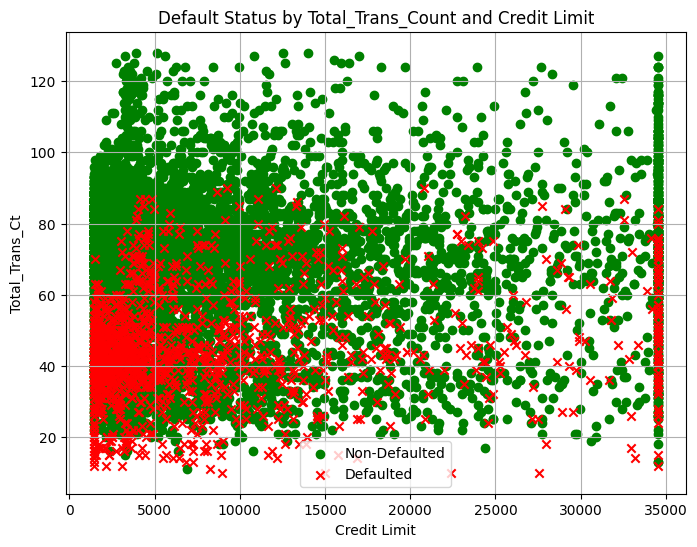

In [77]:


plt.figure(figsize=(8, 6))
plt.scatter(non_defaulted['Credit_Limit'], non_defaulted['Total_Trans_Ct'], label='Non-Defaulted', color='green', marker='o')
plt.scatter(defaulted['Credit_Limit'], defaulted['Total_Trans_Ct'], label='Defaulted', color='red', marker='x')
plt.xlabel('Credit Limit')
plt.ylabel('Total_Trans_Ct')
plt.title('Default Status by Total_Trans_Count and Credit Limit')
plt.legend()
plt.grid(True)
plt.show()
